# Desafio final

## Objetivos

Exercitar os seguintes conceitos trabalhados no Módulo:
- Pré-processamento dos dados.
- Detecção de anomalias.
- Processamento dos dados.
- Correlações.
- Redução da dimensionalidade.
- Algoritmos supervisionados e não supervisionados.

## Enunciado

Para todo engenheiro de Machine Learning, é fundamental que todos os 7 passos para construção de uma solução sejam seguidos. Nesse sentido, saber percorrer todas essas
etapas e, ao final, identificar a melhor estratégia é papel primordial para esse profissional.
Neste desafio final, vamos empregar boa parte dos conceitos mostrados no decorrer de
todos os módulos do Bootcamp para a análise e a classificação de veículos do conhecido
dataset “cars”. Esse dataset contém um conjunto de informações sobre vários veículos
pesquisados. Existem dados, por exemplo, sobre a potência do veículo, sobre a origem e
cilindradas cúbicas.

Para essa análise, vamos empregar os conceitos de redução da dimensionalidade com o PCA, clusterização com o K-Means e classificações com algoritmos supervisionados.

## (01) Importando o dataset e explorando o dataset 

In [131]:
# Bibliotecas para analise de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [132]:
df_cars = pd.read_csv("/content/cars.csv")

In [133]:
df_cars.head(6)

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.
5,23.0,8,350,125,3900,17,1980,US.


Acima temos que mpg = miles-per-gallon


In [134]:
# Tamanho do dataset: num linhas/amostras x num colunas/features
df_cars.shape

(261, 8)

In [135]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


* dtypes: float64(1), int64(4), object(3) 

In [136]:
# Verificando se ha alguma coluna vazia
df_cars.describe()

,mpg,cylinders,hp,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,106.360153,15.547893,1976.819923
std,7.823570,1.733310,40.499959,2.910625,3.637696
min,10.000000,3.000000,46.000000,8.000000,1971.000000
25%,16.900000,4.000000,75.000000,14.000000,1974.000000
50%,22.000000,6.000000,95.000000,16.000000,1977.000000
75%,28.800000,8.000000,138.000000,17.000000,1980.000000
max,46.600000,8.000000,230.000000,25.000000,1983.000000


In [137]:
# Verificando valores ausentes
df_cars.isnull().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

* Sem valores nulos na leitura dos dados

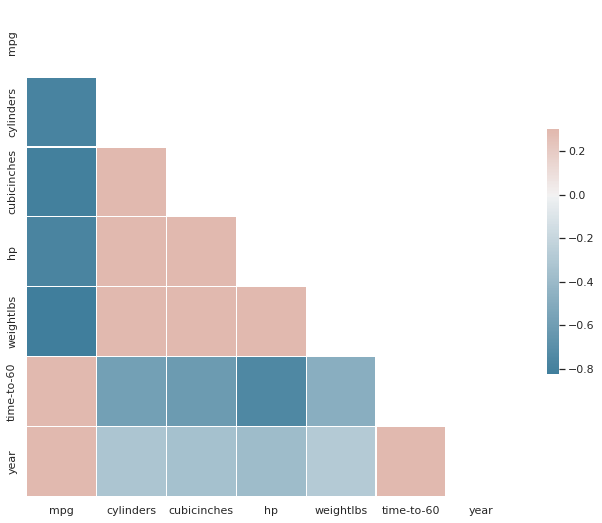

In [138]:
# Analisando a correlacao dos dados

import seaborn as sns

sns.set_theme(style="white")

# Compute the correlation matrix
corr = df_carsN.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## (02) Pré-processamento dos dados

In [139]:
# Convertendo os dados categoricos que vamos usar para o tipo "float"
df_cars['cubicinches'] = pd.to_numeric(df_cars['cubicinches'], errors='coerce')
df_cars['weightlbs'] = pd.to_numeric(df_cars['weightlbs'], errors='coerce')

df_cars.dtypes

mpg            float64
cylinders        int64
cubicinches    float64
hp               int64
weightlbs      float64
time-to-60       int64
year             int64
brand           object
dtype: object

In [140]:
# Verificando se ha dados NaN
print(df_cars['cubicinches'].isnull().values.any()) # True: Tem dados NaN, False: Nao tem dados NaN

True


In [141]:
# Identificando os indices dos elementos nulos da coluna em questao
nulos_cubic = list(df_cars['cubicinches'].isnull())

for indice, nulo in enumerate(nulos_cubic):
  if nulo == bool('True'):
    print('Posicao do elemento nulo: ', indice)

Posicao do elemento nulo:  40
Posicao do elemento nulo:  180


In [142]:
# Verificando valores ausentes
df_cars.isnull().sum()

mpg            0
cylinders      0
cubicinches    2
hp             0
weightlbs      3
time-to-60     0
year           0
brand          0
dtype: int64

* Agora temos um total de $5$ valores nulos no nosso dataframe

In [143]:
# Substituindo valores do tipo NaN pela media
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

columns_cubic_weight_mean = imputer.fit_transform(df_cars[['cubicinches','weightlbs',]])

In [144]:
df_cars[['cubicinches','weightlbs',]] = columns_cubic_weight_mean

In [145]:
# Verificando a nova distribuicao dos dados
df_cars.describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,200.918919,106.360153,3009.833333,15.547893,1976.819923
std,7.823570,1.733310,108.837269,40.499959,849.097575,2.910625,3.637696
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1971.000000
25%,16.900000,4.000000,101.000000,75.000000,2254.000000,14.000000,1974.000000
50%,22.000000,6.000000,156.000000,95.000000,2904.000000,16.000000,1977.000000
75%,28.800000,8.000000,302.000000,138.000000,3664.000000,17.000000,1980.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000


* A média da coluna "weightlbs" agora é $3009.83$

* Notemos também que na coluna/feature "time-to-60" temos um valor de $14$ para o primeiro quartil, ie, $75$% do nosso dataset tem valores maiores que $14$ nessa coluna

In [146]:
# Coeficiente de correlacao de Pearson entre as variaveis "cylinders" e "mpg"
df_cars['mpg'].corr(df_cars['cylinders'])

-0.7767098829879999

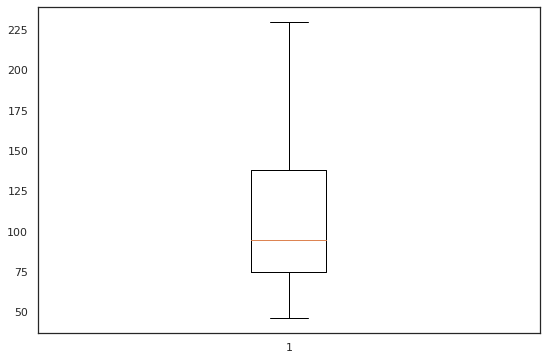

In [147]:
# Boxplot da coluna "hp"
fig = plt.figure(1, figsize=(9,6))
plt.boxplot(df_cars['hp'], notch=False, vert=1)
plt.show()

In [148]:
# Verificando se ha dados NaN
print(df_cars.isnull().values.any()) # True: Tem dados NaN, False: Nao tem dados NaN

False


In [149]:
# Normalizacao dos dados de entrada
from sklearn.preprocessing import StandardScaler

In [182]:
sc_norm = StandardScaler()
data_cars = sc_norm.fit_transform(df_cars[['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60', 'year']])

In [183]:
# Atribuindo os valores normalizados a um novo df
df_carsN = df_cars

df_cars[['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60', 'year']] = data_cars

df_carsN.head(6)

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,-1.171127,1.393053,1.372393,1.450681,1.414997,-1.221287,-1.327539,US.
1,1.121226,-0.919105,-1.030290,-0.874768,-1.280086,-0.532829,0.875880,Europe.
2,-0.786934,1.393053,0.930520,0.832210,0.518209,-1.565516,-1.602966,US.
3,-1.043063,1.393053,1.832677,1.079598,0.886364,-1.909745,-1.602966,US.
4,0.941936,-0.919105,-0.947439,-1.072679,-1.131408,0.499857,0.325025,US.
5,-0.018547,1.393053,1.372393,0.461128,1.050382,0.499857,0.875880,US.


In [184]:
# Valor maximo da coluna "hp"
max(df_carsN['hp'])

3.05870398977614

In [185]:
# Retirando a coluna país
df_carsN = df_carsN.drop('brand', axis=1)

In [186]:
df_carsN.columns

Index(['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year'],
      dtype='object')

In [187]:
# Aplicando o PCA (Principal Component Analysis)
from sklearn.decomposition import PCA

pca = PCA(n_components=7)

# Aplicando ao conjunto de dados de entrada
principalComponents = pca.fit_transform(df_carsN)

In [188]:
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1',
                                                              'principal component 2',
                                                              'principal component 3',
                                                              'principal component 4',
                                                              'principal component 5',
                                                              'principal component 6',
                                                              'principal component 7'])

In [189]:
principalDf.head(6)

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7
0,3.485219,0.526326,-0.139738,0.258792,0.086902,-0.179206,0.079078
1,-2.176912,-0.285424,-1.304613,-0.100465,-0.289698,-0.041147,-0.013127
2,2.684973,1.046946,-0.732156,0.498227,-0.535168,-0.075745,0.159956
3,3.534648,0.847619,-0.801334,0.506630,-0.435696,-0.144237,-0.483162
4,-2.299222,0.194808,-0.221704,0.079650,-0.175655,0.015566,-0.069958
5,1.449778,-1.588722,0.950710,0.742082,-0.196737,0.097858,-0.169286


In [190]:
# Entendendo o PCA
print('Auto-valores')
print(pca.explained_variance_)
print()

print('Auto-vetores')
print(pca.components_)
print()

print('Variancia explicada')
print(pca.explained_variance_ratio_)
print()

Auto-valores
[5.08547901 0.89067223 0.6412862  0.19489813 0.12415126 0.05610469
 0.03433156]

Auto-vetores
[[-0.39506171  0.41462456  0.42751253  0.42083433  0.40887239 -0.3142291
  -0.2150062 ]
 [-0.19235786 -0.19070807 -0.16849764 -0.08613966 -0.2292615  -0.02652165
  -0.9151793 ]
 [-0.2680554   0.1391496   0.10340802 -0.185907    0.31224967  0.87177683
  -0.07768119]
 [ 0.78492487  0.41897225  0.30488383  0.03359866 -0.06717148  0.14290115
  -0.29889703]
 [ 0.25375313 -0.57284721 -0.04443588  0.68664366  0.29119507  0.21066934
  -0.06946382]
 [-0.23036388  0.16557147  0.13987454  0.48340333 -0.75927279  0.27232377
   0.12497802]
 [ 0.03880446  0.49117076 -0.8146501   0.27318464  0.13023416  0.03999117
  -0.02001608]]

Variancia explicada
[0.72371349 0.12675138 0.09126131 0.02773591 0.01766794 0.00798425
 0.00488572]



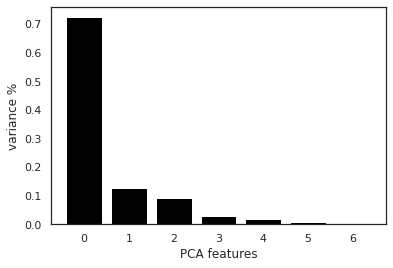

In [192]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.show()

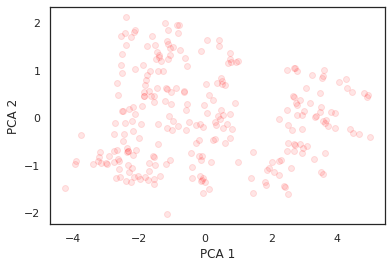

In [196]:
# Relacao entre as componentes principais
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], alpha=.1, color='red')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

* O gráfico acima indica 2 clusters, mostrando que o dataset pode ser agrupado

In [204]:
# Dataframe principal que vamos usar daqui em diante
principalDf.shape

(261, 7)

## (03) Modelo de aprendizado

### (03.1) K-Means

In [205]:
# Conjunto de treino
df_treino = principalDf.iloc[:, :3]

df_treino.head(3)

,principal component 1,principal component 2,principal component 3
0,3.485219,0.526326,-0.139738
1,-2.176912,-0.285424,-1.304613
2,2.684973,1.046946,-0.732156


In [206]:
# Importar o modelo de KMeans
from sklearn.cluster import KMeans

# Instanciando o modelo 
kmeans = KMeans(n_clusters = 3, random_state = 42)

# Treinando o modelo
label = kmeans.fit_predict(df_treino)

In [203]:
# Predicao dos clusters
print(label)

[1 0 1 1 0 1 1 1 2 0 0 0 1 1 2 1 0 1 2 2 0 2 2 1 0 0 2 1 2 0 2 2 2 2 0 2 2
 2 1 2 2 1 2 2 1 0 1 2 0 2 1 0 1 2 1 1 2 0 0 1 2 2 2 0 1 2 2 0 0 1 2 0 2 2
 2 0 2 2 2 0 1 1 1 2 2 0 2 2 2 0 0 0 1 2 0 2 1 2 1 2 1 1 2 0 0 0 0 2 2 1 2
 2 1 0 0 2 2 2 0 1 0 2 1 2 2 2 1 0 2 0 2 0 1 1 1 1 2 1 2 2 2 0 0 0 1 2 2 0
 1 1 0 0 1 2 0 2 2 0 2 2 0 1 2 2 2 2 2 0 2 0 0 2 2 0 2 2 1 1 1 0 2 0 1 1 0
 2 2 1 1 1 0 0 1 1 1 0 0 0 0 0 2 2 2 2 2 1 0 2 1 2 2 1 0 2 2 0 0 1 2 1 2 2
 1 2 1 0 1 0 2 0 1 0 2 1 2 0 1 2 0 2 1 2 1 2 1 1 1 0 0 0 0 2 0 1 2 2 1 0 2
 2 2]


In [209]:
# Plotting Additional K-Means Clusters
# Filter rows of original data
filtered_label0 = df_treino[label == 0]

filtered_label1 = df_treino[label == 1]
 
filtered_label2 = df_treino[label == 2]

In [214]:
filtered_label2.head(3)

,principal component 1,principal component 2,principal component 3
8,-1.050627,-0.883101,1.452750
14,-0.393597,-1.033210,1.216504
18,-1.064403,1.471519,-0.240938


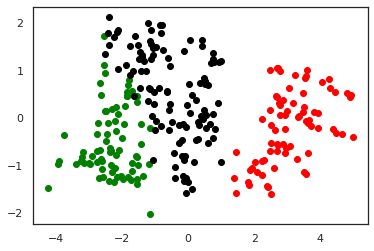

In [213]:
 # Plotting the results
plt.scatter(filtered_label0.iloc[:,0] , filtered_label0.iloc[:,1] , color = 'green')
plt.scatter(filtered_label1.iloc[:,0] , filtered_label1.iloc[:,1] , color = 'red')
plt.scatter(filtered_label2.iloc[:,0] , filtered_label2.iloc[:,1] , color = 'black')
plt.show()

In [217]:
# Numero de elementos em cada cluster
print('Dimensões de cada cluster: ', filtered_label0.shape, filtered_label1.shape, filtered_label2.shape)

Dimensões de cada cluster:  (77, 3) (75, 3) (109, 3)


### (03.2) Árvore de Decisão

In [225]:
# Criando a coluna de eficiencia do veiculo
df_carros = pd.read_csv("/content/cars.csv")

eficiencia = df_carros['mpg'] > 25

In [233]:
# Criando um dicionario de dados para o mapeamento
name_to_class = {
    False: 0,
    True: 1,
    }

eficiencia = eficiencia.map(name_to_class)

In [245]:
saidas_arvore = eficiencia

In [246]:
entradas_arvore = np.array(df_carsN[['cylinders' ,'cubicinches' ,'hp' ,'weightlbs' ,'time-to-60']])

In [247]:
# Realiza a divisão dos dados entre treinamento e teste
from sklearn.model_selection import train_test_split   # Função que realiza a divisão do dataset
X_train, X_test, y_train, y_test = train_test_split(entradas_arvore, saidas_arvore, test_size=0.30,
                                                    random_state=42) # Divide 30% para teste

In [248]:
# Importando o modelo
from sklearn.tree import DecisionTreeClassifier # Importa o classificador árvore de decisão
from sklearn import metrics # Importa as métricas para avaliação

In [249]:
# Cria o objeto de classificação através do 
clf = DecisionTreeClassifier(random_state=42)

# Realiza o treinamento do classificador
clf = clf.fit(X_train,y_train)

# Realiza a previsão de classificaçao 
y_pred = clf.predict(X_test)

In [251]:
# Report de classificacao
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.80      0.87        41
           1       0.82      0.95      0.88        38

    accuracy                           0.87        79
   macro avg       0.88      0.88      0.87        79
weighted avg       0.88      0.87      0.87        79



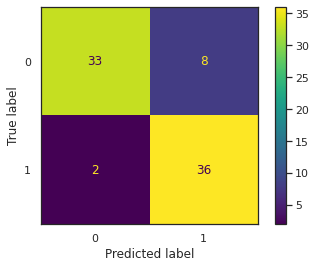

In [252]:
# Matriz de confusao
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test);

In [253]:
# Numero de instancias de veiculos eficientes
saidas_arvore.value_counts()

0    162
1     99
Name: mpg, dtype: int64

### (03.2) Regressão Logística

In [255]:
# Importando o modelo
from sklearn.linear_model import LogisticRegression

# Fit no modelo
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [256]:
y_pred2 = log_reg.predict(X_test)

In [257]:
# Report de classificacao
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        41
           1       0.86      0.84      0.85        38

    accuracy                           0.86        79
   macro avg       0.86      0.86      0.86        79
weighted avg       0.86      0.86      0.86        79



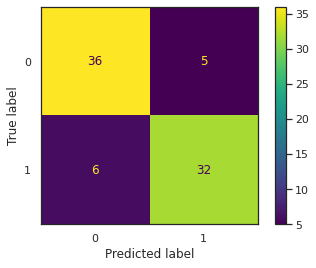

In [258]:
# Matriz de confusao
plot_confusion_matrix(log_reg, X_test, y_test);